In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

In [2]:
from perceptron import Perceptron

In [3]:
def get_data(filepath):
    data = pd.read_csv(filepath)
    X = np.array(data.iloc[:,:-1],).reshape(-1,2).astype('float32')
    y = np.array(data.iloc[:,-1],).reshape(-1,).astype('float32')
    return X,y

In [4]:
X_train,y_train = get_data('./datasets/train.csv')
X_test,y_test = get_data('./datasets/test.csv')

print(f'X_train.shape: {X_train.shape} -- y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape} -- y_test.shape: {y_test.shape}')

X_train.shape: (4000, 2) -- y_train.shape: (4000,)
X_test.shape: (1000, 2) -- y_test.shape: (1000,)


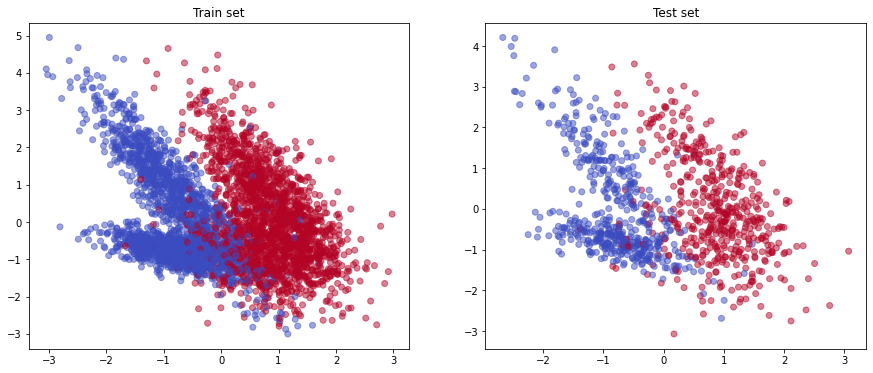

In [5]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Train set')
plt.scatter(X_train[:,0],X_train[:,1],c=y_train.flatten(),alpha=.5,cmap='coolwarm')

plt.subplot(1,2,2)
plt.title('Test set')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test.flatten(),alpha=.5,cmap='coolwarm')
plt.savefig('./data.png')
plt.show()

In [6]:
epochs = 100_000
lr = 0.0001
batch_size = 256

perceptron = Perceptron()
accs = perceptron.fit(X_train,y_train,epochs=epochs,learning_rate=lr,batch_size=batch_size)

Epoch 100000 => Accuracy=0.9212499856948853


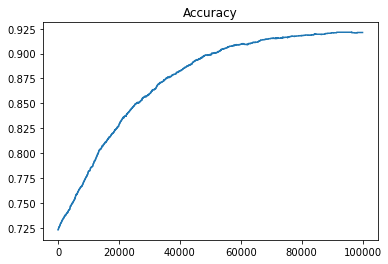

In [7]:
plt.title('Accuracy')
plt.plot(accs)
plt.savefig('./accuracy.png')
plt.show()

In [8]:
print(f'Acc on train_set: {perceptron.score(X_train,y_train)}')
print(f'Acc on test_set: {perceptron.score(X_test,y_test)}')

Acc on train_set: 0.92125
Acc on test_set: 0.923


#### Plot Decision boundry

In [9]:
def get_plot_space(x_s,y_s,n_sample=100):
    space = np.array([[x,y] for x in np.linspace(x_s[0],x_s[1],n_sample) for y in np.linspace(y_s[0],y_s[1],n_sample)])
    return space
    
x_s = [-3.2,3.2]
y_s = [-3.2,5.2]

space = get_plot_space(x_s,y_s)

In [10]:
train_pred = perceptron.predict(X_train)
test_pred = perceptron.predict(X_test)

In [11]:
wrong_train = y_train!=train_pred
wrong_test = y_test!=test_pred

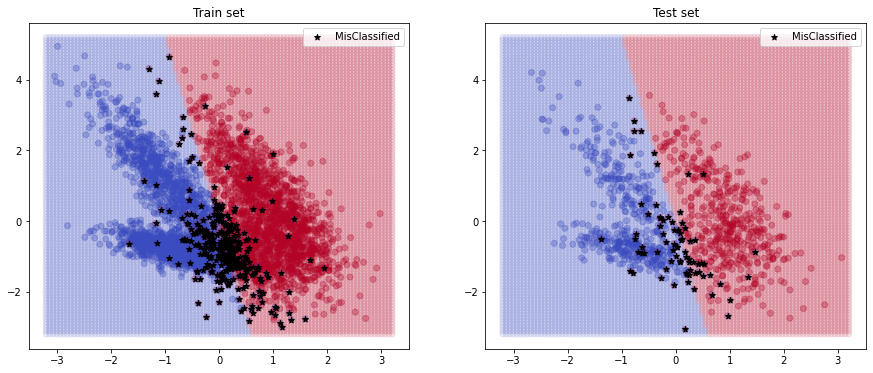

In [14]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Train set')
plt.scatter(X_train[:,0],X_train[:,1],c=y_train.flatten(),alpha=.3,cmap='coolwarm')
y_pred = perceptron.predict(space)
plt.scatter(space[:,0],space[:,1],c=y_pred,alpha=0.1,cmap='coolwarm')
plt.scatter(X_train[wrong_train,0],X_train[wrong_train,1],c='k',#c=y_train[wrong_train].flatten(),
            alpha=1,cmap='coolwarm',marker='*',label='MisClassified')
plt.legend()

plt.subplot(1,2,2)
plt.title('Test set')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test.flatten(),alpha=.3,cmap='coolwarm')
plt.scatter(space[:,0],space[:,1],c=y_pred,alpha=0.1,cmap='coolwarm')
plt.scatter(X_test[wrong_test,0],X_test[wrong_test,1],c='k',#c=y_test[wrong_test].flatten(),
            alpha=1,cmap='coolwarm',marker='*',label='MisClassified')
plt.legend()
plt.savefig('./trained.png')
plt.show()

In [15]:
perceptron._weight,perceptron._bias

(array([1.1007233 , 0.20707698], dtype=float32),
 array([0.00951324], dtype=float32))